In [110]:
from games.kuhn.kuhn import KuhnPoker
from agents.counterfactual_regret_copy import CounterFactualRegret
from agents.conterfactual_regretplus import CounterFactualRegretPlus
from agents.counterfactual_regret_sampling import CounterFactualRegretSampling
from collections import OrderedDict

In [111]:
g = KuhnPoker()

In [112]:
# In your notebook, update the agent creation:
agent_classes = [CounterFactualRegret, CounterFactualRegret]
my_agents = {}
g.reset()
for i, agent in enumerate(g.agents):
    my_agents[agent] = agent_classes[i](
        game=g, 
        agent=agent, 
        track_frequency=50,
        seed=42,
        exploration_bonus=0.02,  # Add exploration
    )

In [113]:
for agent in g.agents:
    print('Training agent ' + agent)
    my_agents[agent].train(10000)
    print('Agent ' + agent + ' policies:')
    print(OrderedDict(map(lambda n: (n, my_agents[agent].node_dict[n].policy()), sorted(my_agents[agent].node_dict.keys()))))
    print('')

Training agent agent_0
Agent agent_0 policies:
OrderedDict([('0', array([0.8550693, 0.1449307])), ('0b', array([9.99916984e-01, 8.30157834e-05])), ('0p', array([0.6321403, 0.3678597])), ('0pb', array([9.99948892e-01, 5.11077670e-05])), ('1', array([9.99594663e-01, 4.05336529e-04])), ('1b', array([0.49992184, 0.50007816])), ('1p', array([9.99277620e-01, 7.22380286e-04])), ('1pb', array([0.53868233, 0.46131767])), ('2', array([0.53175132, 0.46824868])), ('2b', array([0., 1.])), ('2p', array([9.66226598e-05, 9.99903377e-01])), ('2pb', array([1.59809079e-06, 9.99998402e-01]))])

Training agent agent_1
Agent agent_1 policies:
OrderedDict([('0', array([0.79882062, 0.20117938])), ('0b', array([9.99952733e-01, 4.72671769e-05])), ('0p', array([0.70156609, 0.29843391])), ('0pb', array([9.99999327e-01, 6.72623574e-07])), ('1', array([0.99465955, 0.00534045])), ('1b', array([0.66029124, 0.33970876])), ('1p', array([9.99350649e-01, 6.49350649e-04])), ('1pb', array([0.43827186, 0.56172814])), ('2', 

In [114]:
cum_rewards = dict(map(lambda agent: (agent, 0.), g.agents))
niter = 2000
for _ in range(niter):
    g.reset()
    turn = 0
    while not g.done():
        #print('Turn: ', turn)
        #print('\tPlayer: ', g.agent_selection)
        #print('\tObservation: ', g.observe(g.agent_selection))
        a = my_agents[g.agent_selection].action()
        #print('\tAction: ', g._moves[a])
        g.step(action=a)
        turn += 1
    #print('Rewards: ', g.rewards)
    for agent in g.agents:
        cum_rewards[agent] += g.rewards[agent]
print('Average rewards:', dict(map(lambda agent: (agent, cum_rewards[agent]/niter), g.agents)))


Average rewards: {'agent_0': -0.0895, 'agent_1': 0.0895}


In [115]:
print('Check learned policies against theoretical policies:')

Check learned policies against theoretical policies:


In [116]:
JX_b = my_agents[g.agents[0]].node_dict['0'].policy()[1]
print(f'Agent: 0 - Hand: J_ - History: [] - Probability of betting: {JX_b}')


Agent: 0 - Hand: J_ - History: [] - Probability of betting: 0.1449306991084758


In [117]:
QX_pb_b = my_agents[g.agents[0]].node_dict['1pb'].policy()[1]
print(f'Agent: 0 - Hand: Q_ - History: pb - Probability of betting: {QX_pb_b} - Theoretic value: {JX_b+1/3} -  Difference: {abs(QX_pb_b - (JX_b+1/3))}')


Agent: 0 - Hand: Q_ - History: pb - Probability of betting: 0.46131766809978725 - Theoretic value: 0.47826403244180915 -  Difference: 0.016946364342021902


In [118]:
KX_b = my_agents[g.agents[0]].node_dict['2'].policy()[1]
print(f'Agent: 0 - Hand: K_ - History: [] - Probability of betting: {KX_b} - Theoretic value: {3 * JX_b} -  Difference: {abs(KX_b - 3 * JX_b)}')


Agent: 0 - Hand: K_ - History: [] - Probability of betting: 0.46824868392642643 - Theoretic value: 0.43479209732542745 -  Difference: 0.03345658660099898


In [119]:
XJ_p_b = my_agents[g.agents[0]].node_dict['0p'].policy()[1]
print(f'Agent: 0 - Hand: _J - History: p - Probability of betting: {XJ_p_b} - Theoretic value: {1/3} -  Difference: {abs(XJ_p_b - 1/3)}')

Agent: 0 - Hand: _J - History: p - Probability of betting: 0.3678597036341472 - Theoretic value: 0.3333333333333333 -  Difference: 0.0345263703008139


In [120]:
XQ_b_b = my_agents[g.agents[0]].node_dict['1b'].policy()[1]
print(f'Agent: 0 - Hand: _Q - History: b - Probability of betting: {XQ_b_b} - Theoretic value: {1/3} -  Difference: {abs(XQ_b_b - 1/3)}')

Agent: 0 - Hand: _Q - History: b - Probability of betting: 0.500078164801553 - Theoretic value: 0.3333333333333333 -  Difference: 0.16674483146821967


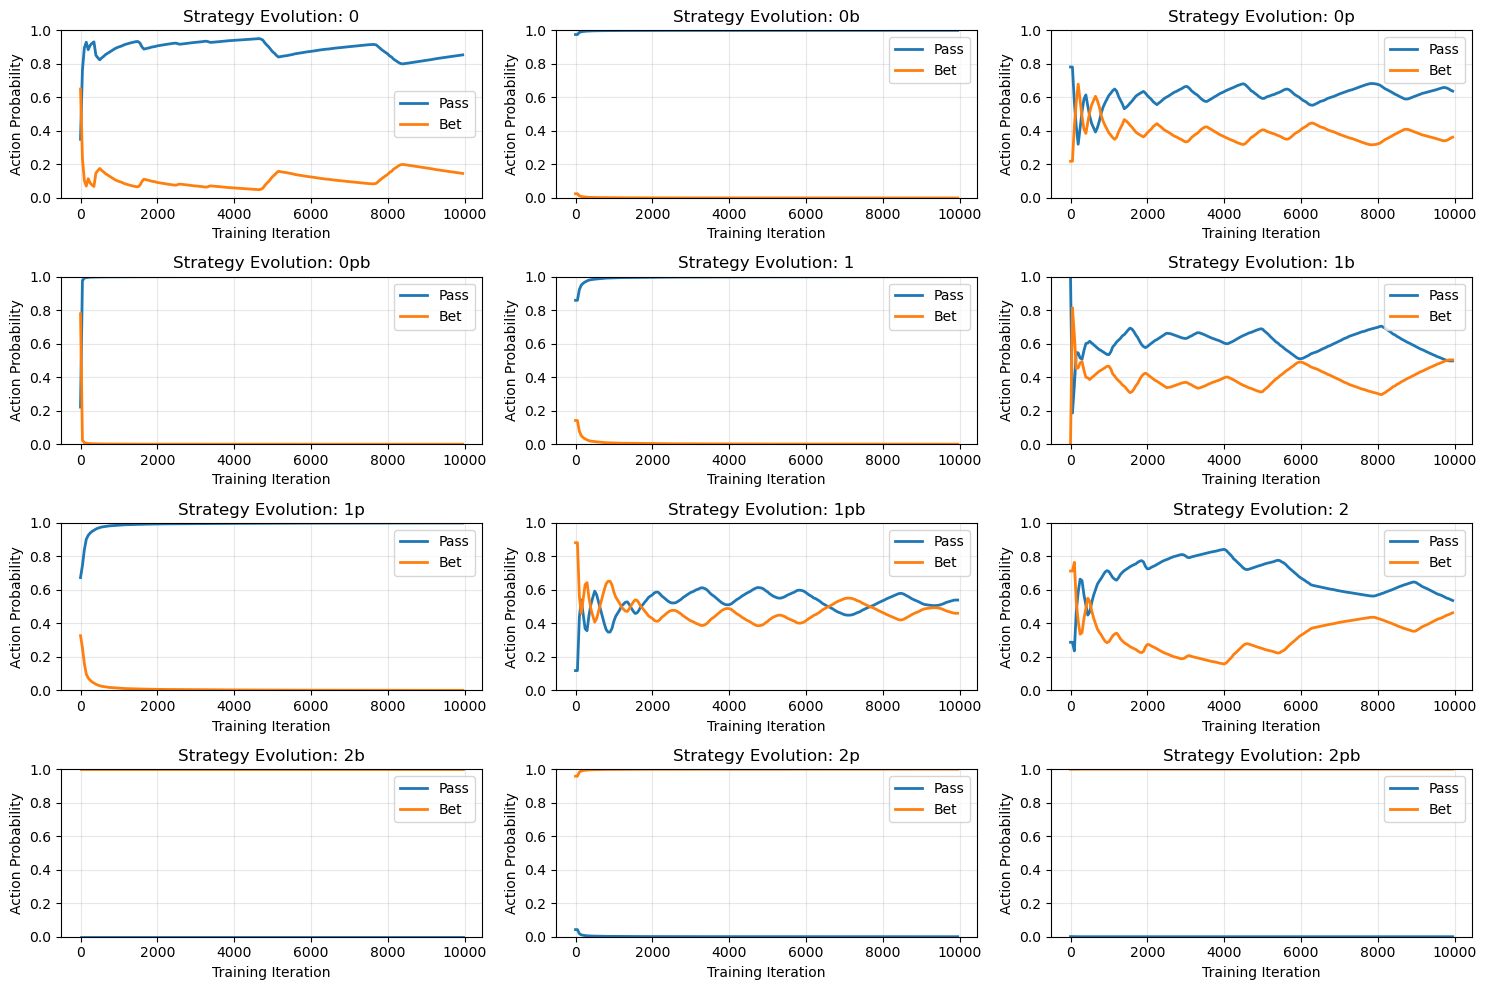

In [121]:
# Plot strategy evolution for all information sets
my_agents[g.agents[0]].plot_strategy_evolution(
    action_names={0: 'Pass', 1: 'Bet'},
    figsize=(15, 10)
)

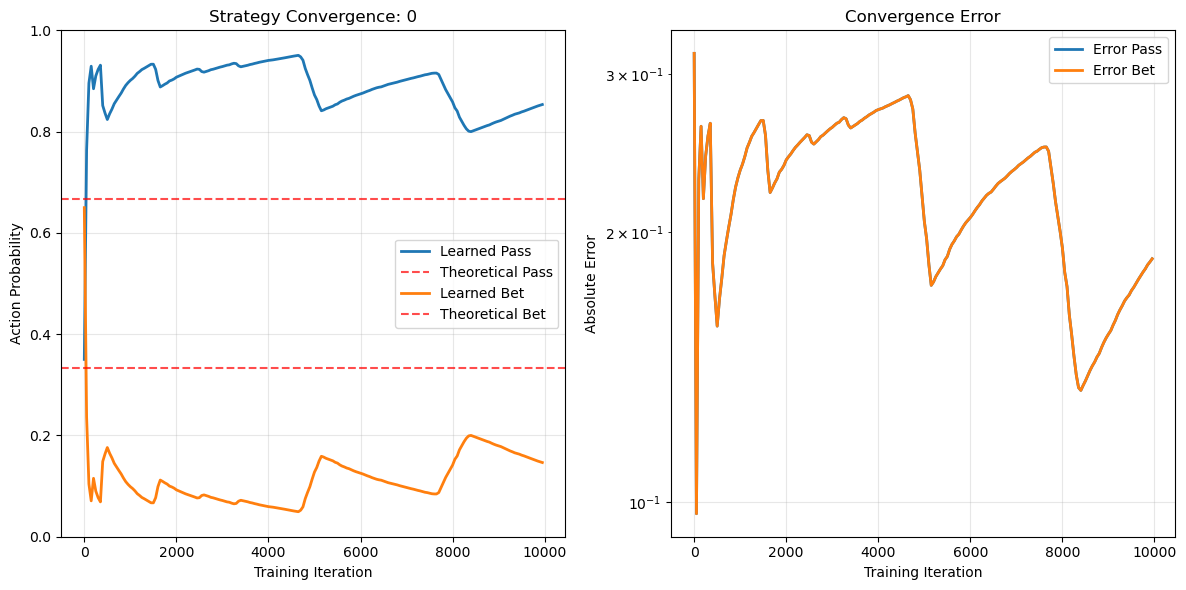

In [122]:
# Plot specific convergence analysis with theoretical values
# Example for Kuhn Poker theoretical values
theoretical_JX_bet = 1/3  # This should be calculated based on equilibrium

my_agents[g.agents[0]].plot_convergence_analysis(
    info_set_key='0',  # Jack with no history
    action_names={0: 'Pass', 1: 'Bet'},
    theoretical_values={0: 1 - theoretical_JX_bet, 1: theoretical_JX_bet},
    figsize=(12, 6)
)

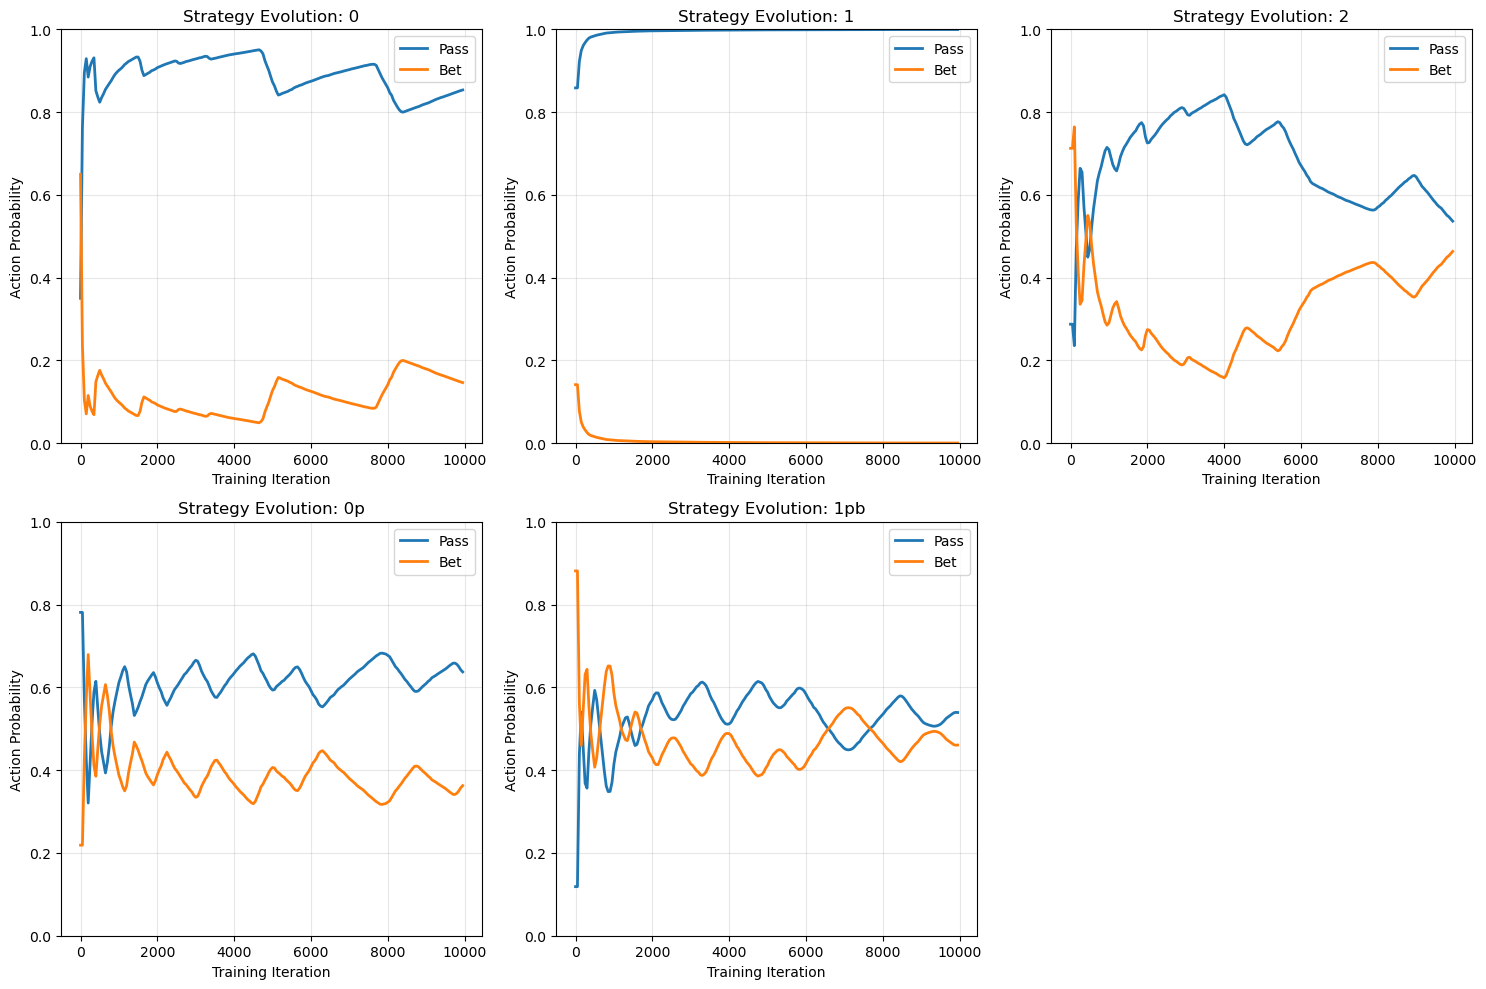

In [123]:
# Compare multiple information sets side by side
key_info_sets = ['0', '1', '2', '0p', '1pb']  # Key information sets for Kuhn Poker
my_agents[g.agents[0]].plot_strategy_evolution(
    info_set_keys=key_info_sets,
    action_names={0: 'Pass', 1: 'Bet'},
    figsize=(15, 10)
)

In [124]:
# Test action mapping
g.reset()
print("Initial state:", g.observe(g.agent_selection))
print("Available actions:", g.available_actions())

# Test action 0
g_test = g.clone()
print("Testing action 0...")
g_test.step(action=0)
print("State after action 0:", g_test.observe(g_test.agent_selection))

Initial state: 0
Available actions: [0, 1]
Testing action 0...
State after action 0: 1p
